Import the packages we'll be using.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import datetime


from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()

#sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

ImportError: No module named 'plotly'

In [2]:
seattle_data_url = "https://raw.githubusercontent.com/weedySeaDragon/datasci_course_materials/master/assignment6" \
       "/seattle_incidents_summer_2014.csv"

In [1]:
df = pd.read_csv(seattle_data_url,  dtype={'RMS CDW ID': int ,'General Offense Number': int,
                              'Offense Code':str, 'Offense Code Extension': int,
                              'Offense Type': str, 'Summary Offense Code': str,
                              'Summarized Offense Description':str,
                              'Date Reported': datetime.datetime, 'Occurred Date or Date Range Start': datetime.datetime,
                              'Occurred Date Range End': datetime.datetime, 'Hundred Block Location': str,
                              'District/Sector': str, 'Zone/Beat': str, 'Census Tract 2000': float,
                              'Longitude': float, 'Latitude': float, 'Location': str, 'Month': int, 'Year': int} )

Verify that we've been able to read in the data by showing the header row and the first 2 rows:

In [1]:
df.head(2)

Change to a Date/Time data type that is more useful.  Print out a few rows with our new data columns to verify that our new columns (with the new Date/Time types) really worked.

In [1]:
# create actual pandas datetime objects from the data:
df['occur_or_start_time'] = df['Occurred Date or Date Range Start'].map(lambda x: ( pd.to_datetime(x,
                                                                                     format = '%m/%d/%Y %H:%M:%S %p',
                                                                                    errors='ignore') ) )
df['occur_end_time'] = df['Occurred Date Range End'].map(lambda x: ( pd.to_datetime(x,
                                                                     format = '%m/%d/%Y %H:%M:%S %p',
                                                                     errors='ignore')) )
df['reported_time'] = df['Date Reported'].map(lambda x: ( pd.to_datetime(x,
                                                          format = '%m/%d/%Y %H:%M:%S %p',
                                                          errors='ignore')) )

# prove that we've done it by showing 5 rows with these new columns:
df[['RMS CDW ID', 'Offense Type', 'reported_time', 'occur_or_start_time','occur_end_time']][:5]

NameError: name 'df' is not defined

Assign the day of the week to each of the time items (reported, start, etc)

In [8]:
# need to order days of week -- so just leave the number in there.  Use  days[] when we print them out.
days = np.array(['Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday',
                 'Sunday'])
    #orig: put the text in there, but we loose the ordering ability:
    #df['reported_dayofweek'] = df['reported_time'].map(lambda x: (days[x.dayofweek] if x is not pd.NaT else ''))
    #df['occur_start_dayofweek'] = df['occur_or_start_time'].map(lambda x: (days[x.dayofweek] if x is not pd.NaT else ''))
    #df['occur_end_dayofweek'] = df['occur_end_time'].map(lambda x: (days[x.dayofweek] if x is not pd.NaT else ''))

df['reported_dayofweek'] = df['reported_time'].dt.dayofweek
df['occur_start_dayofweek'] = df['occur_or_start_time'].dt.dayofweek
df['occur_end_dayofweek'] = df['occur_end_time'].dt.dayofweek

print("reported day of the week:")
print(df['reported_dayofweek'].describe())
print("occur/start day of the week:")
print(df['occur_start_dayofweek'].describe())
print("occur/end day of the week:")
print(df['occur_end_dayofweek'].describe())

reported day of the week:
count    32779.000000
mean         2.835291
std          2.001218
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: reported_dayofweek, dtype: float64
occur/start day of the week:
count    32779.000000
mean         3.022942
std          1.994247
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: occur_start_dayofweek, dtype: float64
occur/end day of the week:
count    16499.000000
mean         2.956846
std          2.037639
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: occur_end_dayofweek, dtype: float64


Assign the day of the month - does the day of month (closer/father to rent due, etc) have an effect?

In [9]:
df['reported_dayofmonth'] = df['reported_time'].dt.day
df['occur_start_dayofmonth'] = df['occur_or_start_time'].dt.day
df['occur_end_dayofmonth'] = df['occur_end_time'].dt.day
print("reported day of the month:")
print(df['reported_dayofmonth'].describe())
print("occur/start day of the month:")
print(df['occur_start_dayofmonth'].describe())
print("occur/end day of the month:")
print(df['occur_end_dayofmonth'].describe())

reported day of the month:
count    32779.000000
mean        16.064981
std          8.860816
min          1.000000
25%          8.000000
50%         16.000000
75%         24.000000
max         31.000000
Name: reported_dayofmonth, dtype: float64
occur/start day of the month:
count    32779.000000
mean        15.996522
std          8.913999
min          1.000000
25%          8.000000
50%         16.000000
75%         24.000000
max         31.000000
Name: occur_start_dayofmonth, dtype: float64
occur/end day of the month:
count    16499.000000
mean        15.958725
std          8.930494
min          1.000000
25%          8.000000
50%         16.000000
75%         24.000000
max         31.000000
Name: occur_end_dayofmonth, dtype: float64


Apply the time of day for each incident

In [10]:
df['reported_hour'] = df['reported_time'].dt.hour
df['occur_start_hour'] = df['occur_or_start_time'].dt.hour
df['occur_end_hour'] = df['occur_end_time'].dt.hour
print("reported hour:")
print(df['reported_hour'].describe())
print("occur/start hour:")
print(df['occur_start_hour'].describe())
print("occur/end hour:")
df['occur_end_hour'].describe()

reported hour:
count    32779.000000
mean         6.728607
std          3.481564
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: reported_hour, dtype: float64
occur/start hour:
count    32779.000000
mean         7.042832
std          3.538850
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: occur_start_hour, dtype: float64
occur/end hour:


count    16499.000000
mean         6.967513
std          3.234169
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: occur_end_hour, dtype: float64

In [11]:
#df.groupby(["occur_start_dayofweek","Offense Type"]).count() # 718 rows x 41 cols
dayofweekDF = df.groupby(["occur_start_dayofweek"])
dayofweekDFcounts =  dayofweekDF.count() # 7 rows x 42 cols
dayofweekDFcounts['Offense Start'] = dayofweekDFcounts['Offense Type'] # we're just creating a different label so our plots look nice; the total [count] is the same

dayofmonthDF = df.groupby(["occur_start_dayofmonth"])
dayofmonthDFcounts = dayofmonthDF.count() # 31 rows x 2 cols = this will always be the x axis

reporteddayofweekDF = df.groupby(["reported_dayofweek"])
reporteddayofweekDFcounts = reporteddayofweekDF.count() # 7 rows x 42 cols
reporteddayofweekDFcounts['Reported'] = reporteddayofweekDFcounts['Offense Type']  # we're just creating a different label so our plots look nice; the total [count] is the same

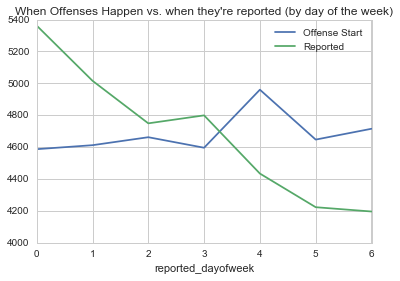

In [12]:
#totals = dayofweekDF.sum()
#total_offenseType = totals['Offense Type']

weekdayOffenses = dayofweekDFcounts['Offense Start']

# plot when they happen v. when they're reported across a WEEK:
weekdayPlot = weekdayOffenses.plot(legend=True)  # dayofweekDF['Offense Type'].plot()  # same as weekdayOffenses.plot
weekdayPlot.set_title("When Offenses Happen vs. when they're reported (by day of the week)")

reporteddayofweekDFcounts['Reported'].plot(legend=True)

# does this vary by week in the summer?

Top 10 Offenses and their total number of occurences


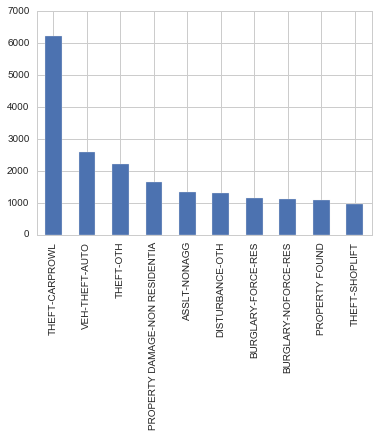

In [19]:
top10 = df['Offense Type'].value_counts()
print ("Top 10 Offenses and their total number of occurences")
top10[:10]
top10[:10].plot(kind='bar')

#  Would be great to use shapes: giant circles, where size = magnitude

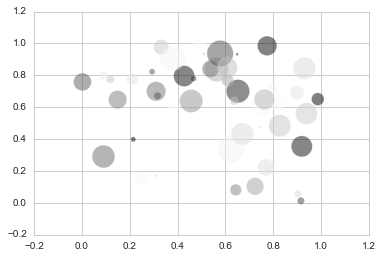

array([ 0.28761666,  0.8760992 ,  0.76804522,  0.3074283 ,  0.17563449,
        0.3402631 ,  0.0254235 ,  0.83160023,  0.00878837,  0.5275956 ,
        0.77211628,  0.29943926,  0.06675582,  0.92857001,  0.84087204,
        0.8708711 ,  0.2141033 ,  0.00413389,  0.39061817,  0.46150239,
        0.2348578 ,  0.65770098,  0.17376933,  0.07521635,  0.30636833,
        0.29873271,  0.68949064,  0.09069848,  0.20766301,  0.04270344,
        0.46880726,  0.57502507,  0.40833192,  0.60435739,  0.30429869,
        0.73324049,  0.54656906,  0.78650643,  0.42645401,  0.1337504 ,
        0.70007275,  0.04383492,  0.92443098,  0.33913453,  0.5777509 ,
        0.70603142,  0.90014445,  0.21714317,  0.33172717,  0.37910245])

In [18]:
"""
Simple demo of a scatter plot.
"""
import numpy.random
import matplotlib.pyplot as plt


#N = 50
#x = numpy.random.rand(N)
#y = numpy.random.rand(N)
#colors = numpy.random.rand(N)

#area = np.pi * (15 * numpy.random.rand(N))**2  # 0 to 15 point radiuses

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)

x = 
plt.show()

Do the crimes vary during the week?  Or are the most common crimes always the most common?

THEFT-CARPROWL                    6230
VEH-THEFT-AUTO                    2588
THEFT-OTH                         2221
PROPERTY DAMAGE-NON RESIDENTIA    1638
ASSLT-NONAGG                      1320
DISTURBANCE-OTH                   1295
BURGLARY-FORCE-RES                1147
BURGLARY-NOFORCE-RES              1118
PROPERTY FOUND                    1069
THEFT-SHOPLIFT                     944
Name: Offense Type, dtype: int64

C:\dev\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


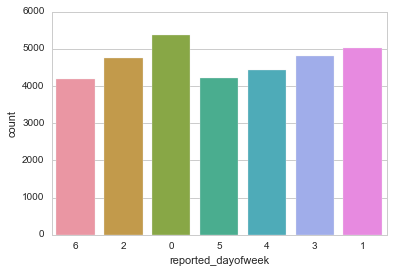

In [21]:
import seaborn as sns
df.sort()
sns.countplot( data=df, x='reported_dayofweek')
#weekdayPlot = weekdayOffenses.plot(type='bar', x='' legend=True)  # dayofweekDF['Offense Type'].plot()  # same as weekdayOffenses.plot
#weekdayPlot.set_title("Most common crimes by day of the week")

In [ ]:
top10bydayDF = pd.DataFrame()
offenseTypes = dayofweekDF['Offense Type'].value_counts()
for k in top10.keys():
    # get the count of the crimes for each day of the week:

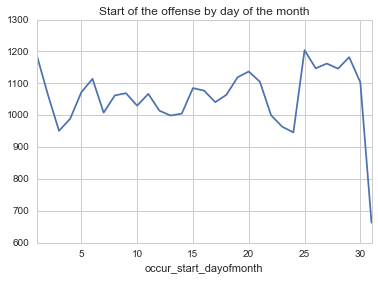

In [22]:
offenses = dayofmonthDF['Offense Type']
offensesPlot = offenses.plot()
offensesPlot.set_title("Start of the offense by day of the month")